# 2. FOOOF

In this tutorial, `ndspflow` will be used to run the fooof analysis node with simulated data. 


In [1]:
import os
import webbrowser
import numpy as np

from fooof import FOOOF
from fooof.sim.gen import gen_group_power_spectra
from fooof.sim.params import param_jitter

### Simulate Data

First, a group of power spectra will be simulated. The 2D array of power spectra and a 1D array of frequencies will be saved as .npy files within the current working directory inside of a directory named "data". 

In [2]:
# Simulate data
n_spectra = 5
f_range = [1, 50]
ap_params = [0, 1]
pe_params = param_jitter([20, .4, 1], [1, 0, 0])

freqs, powers = gen_group_power_spectra(n_spectra, f_range, ap_params, pe_params)

In [3]:
# Save data
for dirname in ['data', 'results']:
    if not os.path.isdir(dirname):
        os.mkdir(dirname)

np.save("data/freqs.npy", freqs)
np.save("data/powers.npy", powers)

### Running FOOOF

Next, the fooof node will be ran using the simulated data. The parameters specified include:

- `freqs` : name of the frequencies .npy file
- `power_spectrum` : name of the spectra .npy file
- `f_range_fooof` : the range of frequencies to fit
- `max_n_peaks` : the maximum number of peaks to fit
- `min_peak_height` : the minimum absolute height of peaks
- `peak_threshold` : the minimum relative height of peaks
- `aperiodic_mode` : the aperiodic model to fit
- `n_jobs` : the number of jobs to run in parallel (-1 defaults to max).
- `run_nodes` : which node(s) to run

In [4]:
%%bash

# Run the fooof node
ndspflow \
-freqs freqs.npy \
-power_spectrum powers.npy \
-f_range_fooof 1 50 \
-max_n_peaks 1 \
-min_peak_height .3 \
-peak_threshold 2 \
-peak_width_limits 1 5 \
-aperiodic_mode fixed \
-n_jobs -1 \
-run_nodes fooof \
data results

210104-14:46:48,446 nipype.workflow INFO:
	 Workflow wf_ndspflow settings: ['check', 'execution', 'logging', 'monitoring']
210104-14:46:48,449 nipype.workflow INFO:
	 Running serially.
210104-14:46:48,450 nipype.workflow INFO:
	 [Node] Setting-up "wf_ndspflow.fooof_node" in "/tmp/tmp17ch5sij/wf_ndspflow/fooof_node".
210104-14:46:48,451 nipype.workflow INFO:
	 [Node] Running "fooof_node" ("ndspflow.core.interfaces.FOOOFNode")
210104-14:46:48,513 nipype.workflow INFO:
	 [Node] Finished "wf_ndspflow.fooof_node".
210104-14:46:48,514 nipype.workflow INFO:
	 [Node] Setting-up "wf_ndspflow.report_node" in "/tmp/tmpo1z_85k5/wf_ndspflow/report_node".
210104-14:46:48,517 nipype.workflow INFO:
	 [Node] Running "report_node" ("ndspflow.core.interfaces.ReportNode")
210104-14:46:48,628 nipype.workflow INFO:
	 [Node] Finished "wf_ndspflow.report_node".


### Results

Group reports help identify problematic fits. These reports include scatter plots of goodness-of-fit measures, periodic parameters, and aperiodic parameters. Selecting points in the group plots will open individual fit reports. Outlier points in these plots may indicate a noisy spectrum or inappropriate parameter settings. Individual reports include a plot of the model fit, fit parameters, and analysis settings. 

In [5]:
# Open the group report in a new tab
webbrowser.open("results/fooof/report_group.html")

True

In [6]:
# Open a single spectrum's report in a new tab
webbrowser.open("results/fooof/spectrum_dim1-0000/report.html")

True

### Loading Results

The fooof node saves individual fit results as json files. These json files may be loaded into FOOOF objects.

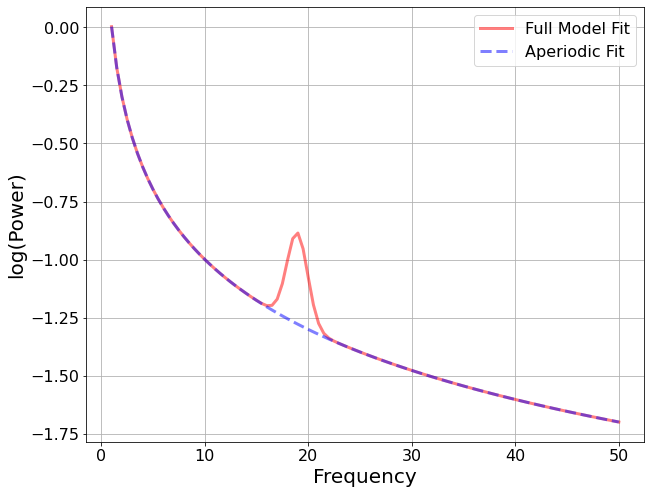

In [7]:
fm = FOOOF()
fm.load("results.json", "results/fooof/spectrum_dim1-0000/")
fm.plot()